# Aviation Accident Data Analysis

---

## Project Objective  

- To identify key risk factors related to aviation accidents to assist stakeholders in making data-driven decisions for starting an aviation business.  

- This project does not involve inferential statistics or machine learning. However, descriptive statistics such as measures of central tendency and visualizations are included to highlight critical insights.

----------------------------------------------------------------------------------------------------------------

## Table of Contents  

1. [Introduction](#Introduction)  
2. [Dataset Understanding](#Dataset-Understanding)  
3. [Data Cleaning](#Data-Cleaning)  
4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)  
5. [Results](#Results)  
6. [Recommendations](#Recommendations)  


## Introduction 

- This project explores aviation accident data to uncover significant trends and risk factors. 

- The dataset includes records of aviation incidents, detailing aspects such as injury severity, weather conditions, and aircraft types. These insights will be valuable for aviation authorities, safety analysts.  

---


## Dataset Understanding

The dataset used in this analysis is sourced from the [National Transportation Safety Board (NTSB) Aviation Accident Database](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses). It provides detailed information about aviation accidents and incidents globally, which includes critical factors such as the severity of injuries, weather conditions, and aircraft specifications.

---

### Key Features in the Original Dataset

| **Column Name**            | **Description**                                                                 |
|-----------------------------|---------------------------------------------------------------------------------|
| `Event.Id`                 | Unique identifier for each event.                                               |
| `Investigation.Type`       | Indicates whether the event was an accident or an incident.                     |
| `Accident.Number`          | Another unique identifier for each event.                                       |
| `Event.Date`               | Date of the event.                                                             |
| `Location`                 | Geographical location where the event occurred.                                |
| `Country`                  | Country in which the event occurred.                                            |
| `Latitude` and `Longitude` | Coordinates of the event location.                                              |
| `Airport.Code` and `Airport.Name` | Details about the airport involved in the event.                        |
| `Aircraft.Category`        | Classification of the aircraft (e.g., airplane, helicopter).                   |
| `Make` and `Model`         | Manufacturer and model of the aircraft.                                         |
| `Injury.Severity`          | Describes the severity of injuries in the event (e.g., fatal, serious).         |
| `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured` | Injury details. |
| `Aircraft.damage`          | The extent of damage to the aircraft (e.g., substantial, destroyed).            |
| `Weather.Condition`        | Weather conditions during the event (e.g., Visual, Instrument).                |
| `Broad.phase.of.flight`    | Phase of flight when the event occurred (e.g., takeoff, cruise).                |
| `Report.Status`            | Status of the investigation report.                                             |
| `Publication.Date`         | Date of the report's publication.                                               |

---

### Dataset Overview

- **Original Rows**: 88,889  
- **Original Columns**: 31  
- The dataset includes both qualitative and quantitative data, with some columns containing a high percentage of missing values.

---

### Limitations in the Original Dataset

1. **Significant Missing Data**:
   - Columns like `Latitude`, `Longitude`, `Airport.Code`, and `Aircraft.Category` have a high proportion of missing values.
   - Such columns are unlikely to contribute meaningfully to the analysis and were considered for removal.

2. **Irrelevant Features**:
   - Columns like `Accident.Number`, `Registration.Number`, and `Publication.Date` are unique identifiers or metadata that do not offer analytical value.

3. **Data Format Issues**:
   - Dates in the `Event.Date` column were stored as strings, requiring conversion to `datetime` format for proper temporal analysis.

---

## Data Cleaning

To prepare the dataset for analysis, the following steps were taken to clean and refine the data:

### Initial Dataset Overview
- **Total Columns**: 31  
- **Total Rows**: 88,889  
- Many columns had significant missing data or were irrelevant for the analysis.

### Key Cleaning Steps
1. **Column Renaming**:
   - Columns were renamed to improve readability and ensure consistent naming conventions.
   - For example, `Event.Id` → `Event_ID`, `Injury.Severity` → `Injury_Severity`.

2. **Handling Missing Values**:
   - Columns with over 12,000 missing values were dropped, as these fields had limited usable data.
   - Rows with missing values in critical columns (e.g., `Flight_Phase`, `Event_Date`) were removed.

3. **Dropping Irrelevant Columns**:
   - Removed columns not directly contributing to the analysis (e.g., `Event_ID`, `Accident_Number`, `Registration_Number`, `Report_Status`, `Publication_Date`).

4. **Creating New Features**:
   - Extracted fatal injuries from the `Injury_Severity` column to create a numeric `Fatal_Injuries` column for quantitative analysis.

5. **Converting Data Types**:
   - Converted `Event_Date` to `datetime` format to facilitate temporal analysis.

6. **Filling Missing Values**:
   - Replaced `NaN` in numerical injury columns (`Total_Serious_Injuries`, `Total_Minor_Injuries`, `Total_Uninjured`) with 0, assuming no injuries were reported.

7. **Removing Duplicates**:
   - Dropped duplicate rows to ensure data integrity.

---

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Configure visualization settings
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [3]:
# Load the dataset
aviation_df = pd.read_csv('C:\\Users\\USER\\Documents\\Anto\\Phase1\\dsc-project-one-master\\data\\Aviation_Data.csv', encoding='latin-1')

# Display the initial structure of the dataset
print("Aviation Dataset Info:")
aviation_df.info()

C:\Users\USER\AppData\Local\Temp\ipykernel_11252\147718952.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv('C:\\Users\\USER\\Documents\\Anto\\Phase1\\dsc-project-one-master\\data\\Aviation_Data.csv', encoding='latin-1')


Aviation Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make           

In [4]:
# Display the first few rows
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
# Rename columns for better readability
# Rename columns for consistency and readability
aviation_df.rename(columns={
    'Event.Id': 'Event_ID',
    'Investigation.Type': 'Investigation_Type',
    'Accident.Number': 'Accident_Number',
    'Event.Date': 'Event_Date',
    'Location': 'Location',
    'Country': 'Country',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    'Airport.Code': 'Airport_Code',
    'Airport.Name': 'Airport_Name',
    'Injury.Severity': 'Injury_Severity',
    'Aircraft.damage': 'Aircraft_Damage',
    'Aircraft.Category': 'Aircraft_Category',
    'Registration.Number': 'Registration_Number',
    'Make': 'Aircraft_Make',
    'Model': 'Aircraft_Model',
    'Amateur.Built': 'Amateur_Built',
    'Number.of.Engines': 'Number_of_Engines',
    'Engine.Type': 'Engine_Type',
    'FAR.Description': 'FAR_Description',
    'Schedule': 'Schedule',
    'Purpose.of.flight': 'Purpose_of_Flight',
    'Air.carrier': 'Air_Carrier',
    'Total.Fatal.Injuries': 'Total_Fatal_Injuries',
    'Total.Serious.Injuries': 'Total_Serious_Injuries',
    'Total.Minor.Injuries': 'Total_Minor_Injuries',
    'Total.Uninjured': 'Total_Uninjured',
    'Weather.Condition': 'Weather_Condition',
    'Broad.phase.of.flight': 'Flight_Phase',
    'Report.Status': 'Report_Status',
    'Publication.Date': 'Publication_Date'
}, inplace=True)


In [6]:
# Remove duplicates from 'Event_ID'
aviation_df = aviation_df.drop_duplicates(subset=['Event_ID'])

In [7]:
# Convert 'Event_Date' to datetime format and handle errors
aviation_df['Event_Date'] = pd.to_datetime(aviation_df['Event_Date'], errors='coerce')

In [8]:
# Drop columns that are not useful for analysis
aviation_df.drop(columns=['Event_ID', 'Accident_Number', 'Registration_Number', 'Report_Status'], inplace=True)


In [9]:
# Check for missing values in both DataFrames
print("Missing Values - Aviation Data Frame:")
print(aviation_df.isnull().sum())



Missing Values - Aviation Data Frame:
Investigation_Type            0
Event_Date                    1
Location                     53
Country                     223
Latitude                  53740
Longitude                 53749
Airport_Code              38468
Airport_Name              35921
Injury_Severity             991
Aircraft_Damage            3104
Aircraft_Category         55771
Aircraft_Make                64
Aircraft_Model               93
Amateur_Built               101
Number_of_Engines          6028
Engine_Type                7044
FAR_Description           56037
Schedule                  75592
Purpose_of_Flight          6123
Air_Carrier               71419
Total_Fatal_Injuries      11268
Total_Serious_Injuries    12323
Total_Minor_Injuries      11761
Total_Uninjured            5864
Weather_Condition          4474
Flight_Phase              27115
Publication_Date          15058
dtype: int64


In [10]:
#check the data Frames shape before creating a new column
aviation_df.shape

(87952, 27)

In [11]:
# Extract fatal injuries from text data
aviation_df['Fatal_Injuries'] = aviation_df['Injury_Severity'].apply(
    lambda x: int(re.search(r'Fatal\((\d+)\)', x).group(1)) if isinstance(x, str) and re.search(r'Fatal\((\d+)\)', x) else 0
)


In [12]:
# Replace NaN values in 'Total_Fatal_Injuries' with the values from 'Fatal_Injuries' 
aviation_df['Total_Fatal_Injuries'] = aviation_df.apply( lambda row: row['Fatal_Injuries'] if pd.isnull(row['Total_Fatal_Injuries']) else row['Total_Fatal_Injuries'], axis=1 )

In [13]:
aviation_df.shape

(87952, 28)

In [14]:
# Handle missing values in columns
aviation_df['Weather_Condition'].fillna('UNK', inplace=True)
aviation_df.dropna(subset=['Flight_Phase'], inplace=True)
aviation_df.fillna({
    'Total_Serious_Injuries': 0,
    'Total_Minor_Injuries': 0,
    'Total_Uninjured': 0
}, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11252\2481993029.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aviation_df['Weather_Condition'].fillna('UNK', inplace=True)


In [15]:
# Check for missing values in both DataFrames
print("Missing Values - Aviation Data Frame:")
print(aviation_df.isnull().sum())


Missing Values - Aviation Data Frame:
Investigation_Type            0
Event_Date                    0
Location                     14
Country                     211
Latitude                  49483
Longitude                 49493
Airport_Code              26724
Airport_Name              24350
Injury_Severity               0
Aircraft_Damage            1378
Aircraft_Category         53536
Aircraft_Make                11
Aircraft_Model               30
Amateur_Built                18
Number_of_Engines           895
Engine_Type                 381
FAR_Description           53532
Schedule                  52333
Purpose_of_Flight          1047
Air_Carrier               57832
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Flight_Phase                  0
Publication_Date          12276
Fatal_Injuries                0
dtype: int64


In [16]:
# Drop columns with more than 12,000 missing values to maintain data quality
aviation_df.dropna(thresh=len(aviation_df) - 12000, axis=1, inplace=True)

In [17]:
aviation_df.shape

(60837, 19)

In [18]:
#Drop rows where 'Flight_Phase' is missing as it is a critical variable for analysis
aviation_df.dropna(subset=['Flight_Phase'], inplace=True)

In [19]:
# Drop duplicate rows
aviation_df.drop_duplicates(inplace=True)

In [20]:
# Display cleaned dataset information
print("Cleaned Dataset Info:")
aviation_df.info()

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 60834 entries, 0 to 63911
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation_Type      60834 non-null  object        
 1   Event_Date              60834 non-null  datetime64[ns]
 2   Location                60820 non-null  object        
 3   Country                 60623 non-null  object        
 4   Injury_Severity         60834 non-null  object        
 5   Aircraft_Damage         59456 non-null  object        
 6   Aircraft_Make           60823 non-null  object        
 7   Aircraft_Model          60804 non-null  object        
 8   Amateur_Built           60816 non-null  object        
 9   Number_of_Engines       59939 non-null  float64       
 10  Engine_Type             60453 non-null  object        
 11  Purpose_of_Flight       59787 non-null  object        
 12  Total_Fatal_Injuries    60834

In [21]:
# Drop rows with any remaining missing values to ensure data completeness
aviation_df.dropna(inplace=True)


In [22]:
# Confirm data cleaning by checking the final DataFrame structure and memory usage
print(aviation_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 57392 entries, 0 to 63911
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation_Type      57392 non-null  object        
 1   Event_Date              57392 non-null  datetime64[ns]
 2   Location                57392 non-null  object        
 3   Country                 57392 non-null  object        
 4   Injury_Severity         57392 non-null  object        
 5   Aircraft_Damage         57392 non-null  object        
 6   Aircraft_Make           57392 non-null  object        
 7   Aircraft_Model          57392 non-null  object        
 8   Amateur_Built           57392 non-null  object        
 9   Number_of_Engines       57392 non-null  float64       
 10  Engine_Type             57392 non-null  object        
 11  Purpose_of_Flight       57392 non-null  object        
 12  Total_Fatal_Injuries    57392 non-null  float64    

In [23]:
# Save the cleaned DataFrame to a new CSV file
aviation_df.to_csv('aviation_data_clean.csv', index=False)

# Notify that the data has been successfully saved
print("DataFrame has been saved as 'aviation_data_clean.csv' ready for Tableau")

DataFrame has been saved as 'aviation_data_clean.csv' ready for Tableau


### Refined Dataset
After cleaning, the dataset was reduced to include **19 columns** and **57,392 rows**, with all missing values addressed.

---

## Key Columns in the Refined Dataset

The cleaned dataset includes the following columns, which are crucial for our analysis:

| **Column Name**          | **Description**                                                                 |
|---------------------------|---------------------------------------------------------------------------------|
| `Investigation_Type`      | Whether the event was an accident or an incident.                              |
| `Event_Date`              | Date of the event.                                                             |
| `Location`                | Location of the event.                                                         |
| `Country`                 | Country where the event occurred.                                              |
| `Injury_Severity`         | Describes the severity of the injuries.                                        |
| `Aircraft_Damage`         | Extent of damage to the aircraft (e.g., substantial, destroyed).               |
| `Aircraft_Make`           | Manufacturer of the aircraft involved.                                         |
| `Aircraft_Model`          | Model of the aircraft.                                                         |
| `Amateur_Built`           | Indicates whether the aircraft was amateur-built.                              |
| `Number_of_Engines`       | Number of engines on the aircraft.                                             |
| `Engine_Type`             | Type of engine used.                                                           |
| `Purpose_of_Flight`       | Purpose of the flight (e.g., personal, commercial).                            |
| `Total_Fatal_Injuries`    | Number of fatal injuries reported.                                             |
| `Total_Serious_Injuries`  | Number of serious injuries reported.                                           |
| `Total_Minor_Injuries`    | Number of minor injuries reported.                                             |
| `Total_Uninjured`         | Number of uninjured individuals.                                               |
| `Weather_Condition`       | Weather conditions at the time of the event (e.g., Visual, Instrument).        |
| `Flight_Phase`            | Phase of flight during the event (e.g., takeoff, landing).                     |
| `Fatal_Injuries`          | Extracted numerical representation of fatal injuries from `Injury_Severity`.   |

---

### Summary of Cleaned Dataset
- **Total Rows**: 57,392  
- **Total Columns**: 19  

# Exploratory Data Analysis (EDA) 

C:\Users\USER\AppData\Local\Temp\ipykernel_11252\82914593.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=aviation_df, x='Year', palette='viridis')


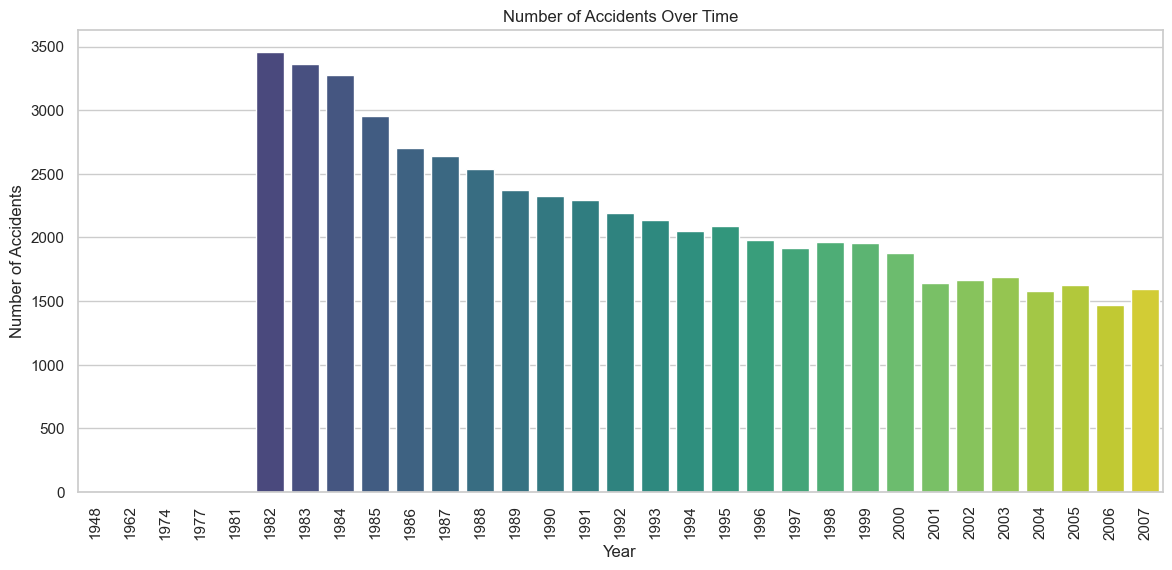

In [24]:
# 1. Number of accidents over time
aviation_df['Year'] = aviation_df['Event_Date'].dt.year
plt.figure(figsize=(14, 6))
sns.countplot(data=aviation_df, x='Year', palette='viridis')
plt.title('Number of Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()

## Injury Analysis

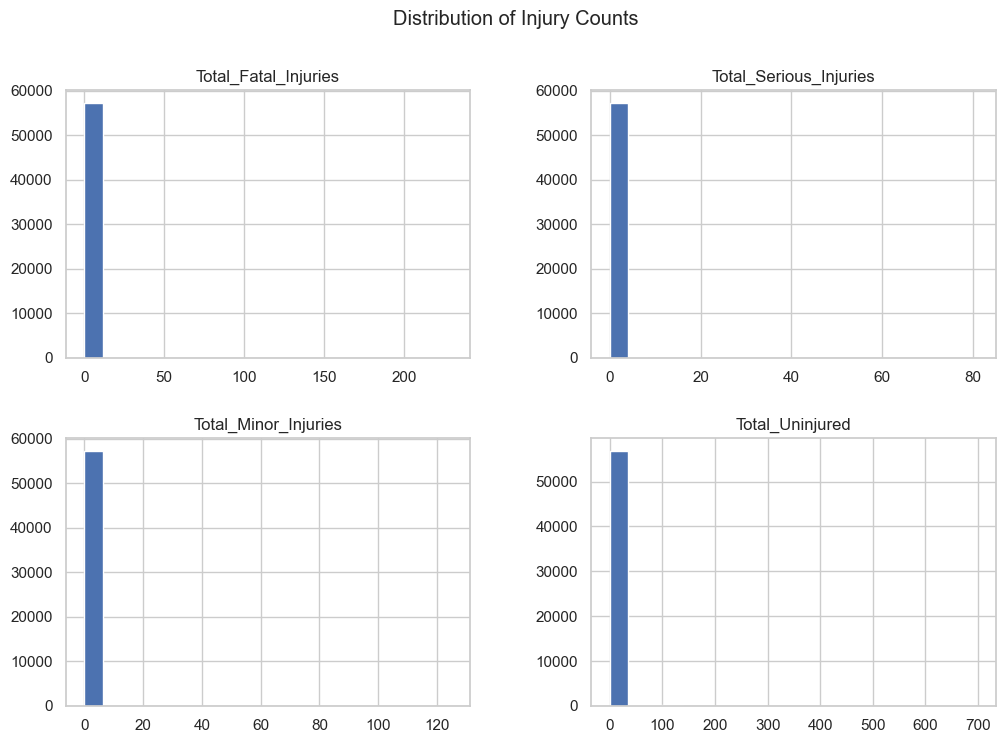

In [25]:
injury_columns = ['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']
aviation_df[injury_columns].hist(bins=20, figsize=(12, 8), layout=(2, 2))
plt.suptitle('Distribution of Injury Counts')
plt.show()


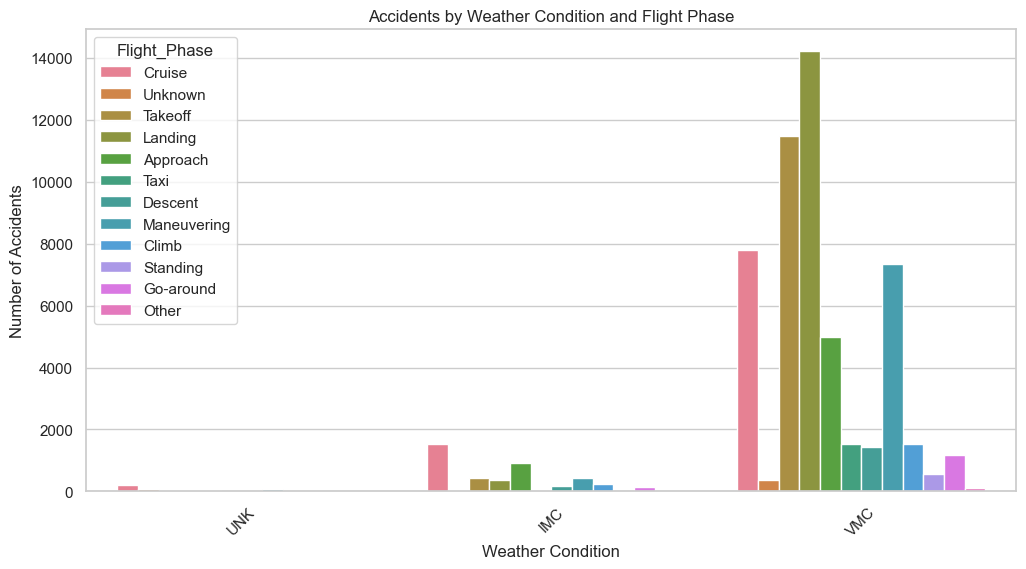

In [26]:
# 3. Accidents by weather condition
plt.figure(figsize=(12, 6))
sns.countplot(data=aviation_df, x='Weather_Condition', hue='Flight_Phase')
plt.title('Accidents by Weather Condition and Flight Phase')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

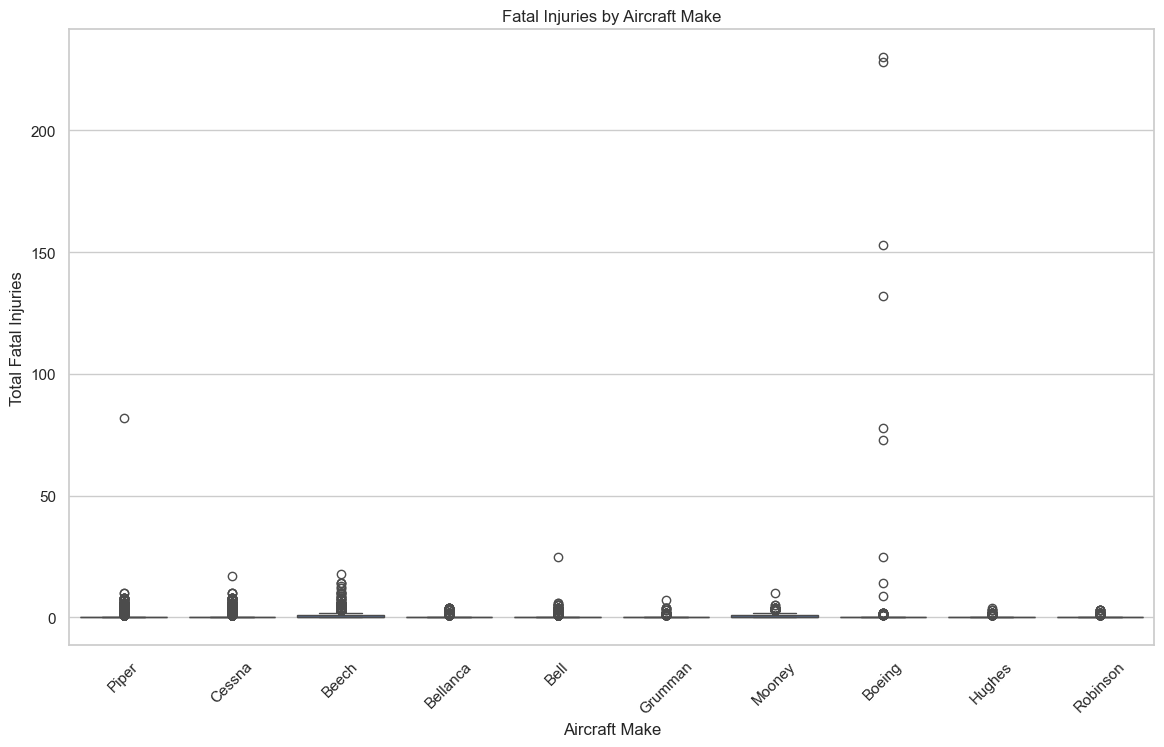

In [27]:
# 4. Fatal injuries by aircraft make
top_makes = aviation_df['Aircraft_Make'].value_counts().head(10).index
plt.figure(figsize=(14, 8))
sns.boxplot(data=aviation_df[aviation_df['Aircraft_Make'].isin(top_makes)], x='Aircraft_Make', y='Total_Fatal_Injuries')
plt.title('Fatal Injuries by Aircraft Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.show()

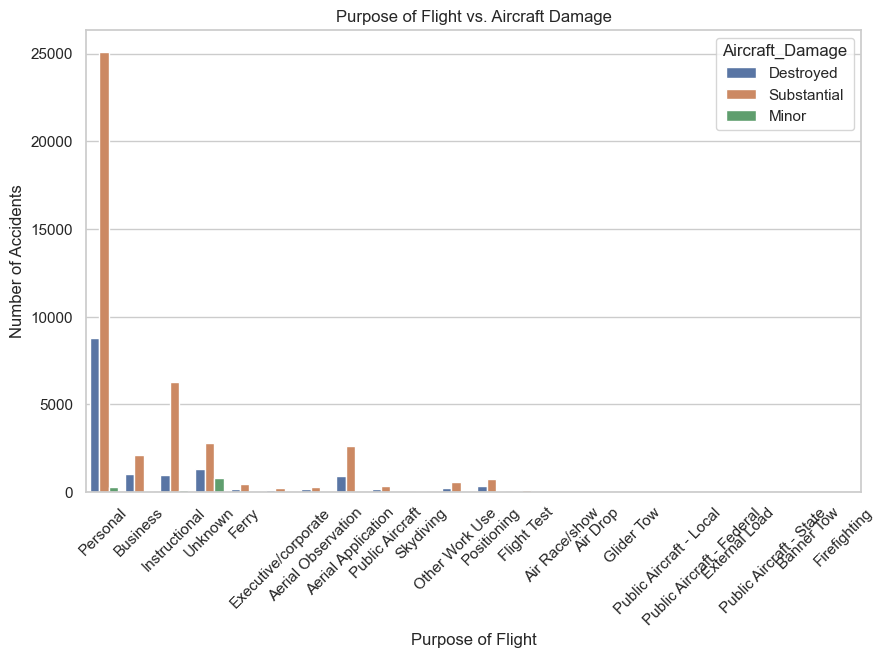

In [28]:
# 5. Purpose of flight analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=aviation_df, x='Purpose_of_Flight', hue='Aircraft_Damage')
plt.title('Purpose of Flight vs. Aircraft Damage')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

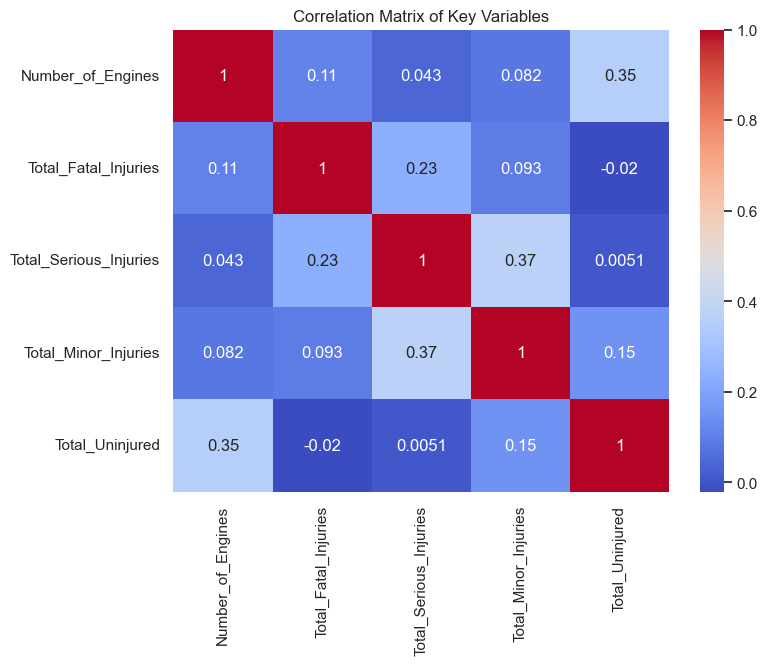

In [29]:
# 6. Correlation matrix
corr = aviation_df[['Number_of_Engines', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 
                    'Total_Minor_Injuries', 'Total_Uninjured']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Variables')
plt.show()

In [30]:
# End Of Notebook2